<a href="https://colab.research.google.com/github/ivanpaulcodes/CPU-Scheduling-Algorithms/blob/main/SRTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of processes: 6
Enter process ID for process #1: P1
Enter arrival time for process P1: 2
Enter burst time for process P1: 4
Enter process ID for process #2: P2
Enter arrival time for process P2: 1
Enter burst time for process P2: 8
Enter process ID for process #3: P3
Enter arrival time for process P3: 2
Enter burst time for process P3: 4
Enter process ID for process #4: P4
Enter arrival time for process P4: 3
Enter burst time for process P4: 4
Enter process ID for process #5: P5
Enter arrival time for process P5: 0
Enter burst time for process P5: 9
Enter process ID for process #6: P6
Enter arrival time for process P6: 2
Enter burst time for process P6: 6


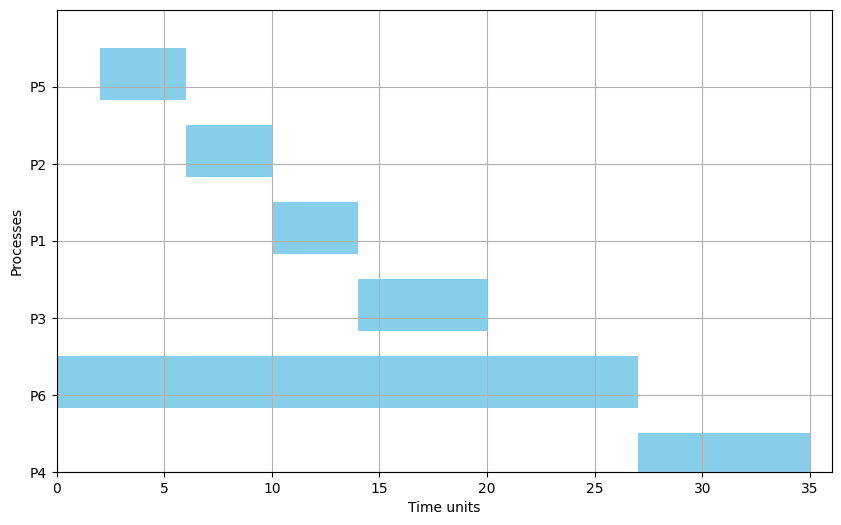

  Process  AT  BT  Start_time  End_time  TAT  WT  RT
0      P5   0   9           0        27   27  18   0
1      P2   1   8          27        35   34  26  26
2      P1   2   4           2         6    4   0   0
3      P3   2   4           6        10    8   4   4
4      P6   2   6          14        20   18  12  12
5      P4   3   4          10        14   11   7   7
Average TAT: 17.0
Average WT: 11.166666666666666
Average RT: 8.166666666666666


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Function to request process information from the user
def get_process_info():
    num_processes = int(input("Enter the number of processes: "))
    processes = []
    arrival_times = []
    burst_times = []

    for i in range(num_processes):
        process_id = input(f"Enter process ID for process #{i+1}: ")
        at = int(input(f"Enter arrival time for process {process_id}: "))
        bt = int(input(f"Enter burst time for process {process_id}: "))
        processes.append(process_id)
        arrival_times.append(at)
        burst_times.append(bt)

    return processes, arrival_times, burst_times

# Call the function to get user input
processes, arrival_times, burst_times = get_process_info()

# Combine the processes, arrival_times, and burst_times into a DataFrame
df = pd.DataFrame({
    'Process': processes,
    'AT': arrival_times,
    'BT': burst_times,
    'Remaining_BT': burst_times
})

# Sort by arrival time for initial order
df_sorted = df.sort_values(by=['AT', 'Process']).reset_index(drop=True)

# Initializing other columns for the DataFrame
df_sorted['Start_time'] = -1
df_sorted['End_time'] = -1
df_sorted['Completed'] = False

# SRTF scheduling algorithm
current_time = 0
start_times = []
end_times = []
while not df_sorted['Completed'].all():
    # Filter processes that have arrived and are not completed
    available_processes = df_sorted[(df_sorted['AT'] <= current_time) & (~df_sorted['Completed'])]

    if available_processes.empty:
        # No process is available to run; move forward in time
        current_time += 1
        continue

    # Select process with minimum remaining burst time
    current_process_idx = available_processes['Remaining_BT'].idxmin()
    current_process = df_sorted.loc[current_process_idx]

    # If the process is starting for the first time, set the start time
    if current_process['Start_time'] == -1:
        df_sorted.at[current_process_idx, 'Start_time'] = current_time

    # Execute the current process for one unit of time
    df_sorted.at[current_process_idx, 'Remaining_BT'] -= 1
    current_time += 1

    # If the process is completed, set the end time and mark as completed
    if df_sorted.at[current_process_idx, 'Remaining_BT'] == 0:
        df_sorted.at[current_process_idx, 'End_time'] = current_time
        df_sorted.at[current_process_idx, 'Completed'] = True
        start_times.append(df_sorted.at[current_process_idx, 'Start_time'])
        end_times.append(current_time)

# Calculating TAT, WT, and RT
df_sorted['TAT'] = df_sorted['End_time'] - df_sorted['AT']
df_sorted['WT'] = df_sorted['TAT'] - df_sorted['BT']
df_sorted['RT'] = df_sorted['Start_time'] - df_sorted['AT']

# Create a Gantt chart
fig, gnt = plt.subplots(figsize=(10, 6))

# Setting Y-axis limits
gnt.set_ylim(0, 50)

# Setting X-axis limits
gnt.set_xlim(0, df_sorted['End_time'].max() + 1)

# Setting labels for x-axis and y-axis
gnt.set_xlabel('Time units')
gnt.set_ylabel('Processes')

# Setting ticks on y-axis
gnt.set_yticks([15 * (i + 1) for i in range(len(df_sorted))])
gnt.set_yticklabels(df_sorted['Process'])

# Setting graph attribute
gnt.grid(True)

# Adding bars for Gantt chart
for i, (start, end) in enumerate(zip(start_times, end_times)):
    gnt.add_patch(Rectangle((start, 15 * (i + 0.5)), end - start, 10, facecolor='skyblue'))

# Inverting the y-axis to have the first process at the top
plt.gca().invert_yaxis()

# Display the Gantt chart
plt.show()

# Print the DataFrame
print(df_sorted[['Process', 'AT', 'BT', 'Start_time', 'End_time', 'TAT', 'WT', 'RT']])

# Print average TAT and WT
print('Average TAT:', df_sorted['TAT'].mean())
print('Average WT:', df_sorted['WT'].mean())
print('Average RT:', df_sorted['RT'].mean())
